In [1]:
#options(repos='http://cran.md.tsukuba.ac.jp')
#options(repos='http://R.research.att.com/')
#install.packages('vegan')
#install.packages("corrplot")

## 0.「文書-抽出語」表を読み込む

In [2]:
d <- NULL
d <- read.table("export.csv", header=T, sep=",")

d[d$'h5'<=5000, 1] <- "A_レジャー"
d[d$'h5'>=5001 & d$'h5'<=10000, 1] <- "B_ビジネス"
d[d$'h5'<=1000, 2] <- "01_登別"
d[d$'h5'>=1001 & d$'h5'<= 2000, 2] <- "02_草津"
d[d$'h5'>=2001 & d$'h5'<= 3000, 2] <- "03_箱根"
d[d$'h5'>=3001 & d$'h5'<= 4000, 2] <- "04_道後"
d[d$'h5'>=4001 & d$'h5'<= 5000, 2] <- "05_湯布院"
d[d$'h5'>=5001 & d$'h5'<= 6000, 2] <- "06_札幌"
d[d$'h5'>=6001 & d$'h5'<= 7000, 2] <- "07_名古屋"
d[d$'h5'>=7001 & d$'h5'<= 8000, 2] <- "08_東京"
d[d$'h5'>=8001 & d$'h5'<= 9000, 2] <- "09_大阪"
d[d$'h5'>=9001 & d$'h5'<=10000, 2] <- "10_福岡"

d<-d[,c(1:2,11:ncol(d))]
names(d)[1] <- "カテゴリー"
names(d)[2] <- "エリア" 

## 1. 対応分析 (corresp を利用する場合)

### (a)「抽出語-文書」表 を確認する

In [3]:
d[1:10,1:10]

,カテゴリー,エリア,部屋,風呂,ホテル,温泉,お部屋,スタッフ,立地,フロント
,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,A_レジャー,01_登別,0,0,0,0,0,0,0,1
2,A_レジャー,01_登別,0,0,0,0,0,1,0,0
3,A_レジャー,01_登別,1,1,0,0,0,0,0,0
4,A_レジャー,01_登別,0,0,1,1,0,0,0,0
5,A_レジャー,01_登別,0,0,0,0,0,0,0,0
6,A_レジャー,01_登別,0,0,0,0,0,0,0,0
7,A_レジャー,01_登別,0,0,0,0,1,1,0,0
8,A_レジャー,01_登別,0,0,0,0,0,0,0,0
9,A_レジャー,01_登別,0,0,0,0,0,0,0,0


### (b) 対応分析で2次元プロットする

In [4]:
d0 <- aggregate(d[,3:ncol(d)], by=list(name=d$"カテゴリー"), sum)
row.names(d0) <- d0$name; d0$name <- NULL
d1 <- aggregate(d[,3:ncol(d)], by=list(name=d$"エリア"), sum)
row.names(d1) <- d1$name; d1$name <- NULL

table.N <- d0;
table.N <- rbind(table.N, d1)

In [5]:
# 観測度数
table.N[1:10,1:10]

,部屋,風呂,ホテル,温泉,お部屋,スタッフ,立地,フロント,最高,浴場
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
A_レジャー,2571,2064,1093,1610,1098,1027,507,396,704,500
B_ビジネス,2142,663,1633,109,455,427,827,671,255,365
01_登別,506,371,254,264,162,165,48,84,142,110
02_草津,529,501,271,459,216,179,177,80,166,88
03_箱根,585,446,213,278,313,272,64,73,121,120
04_道後,441,217,283,312,116,125,143,115,83,102
05_湯布院,510,529,72,297,291,286,75,44,192,80
06_札幌,431,128,327,30,91,101,178,122,49,92
07_名古屋,376,132,313,19,82,62,129,122,56,89


In [6]:
library(MASS)
d_max <- min(nrow(table.N), ncol(table.N)) - 1
c <- corresp(table.N, nf=d_max)
summary(c)

       Length Class  Mode   
cor     11    -none- numeric
rscore 132    -none- numeric
cscore 462    -none- numeric
Freq   504    -none- numeric

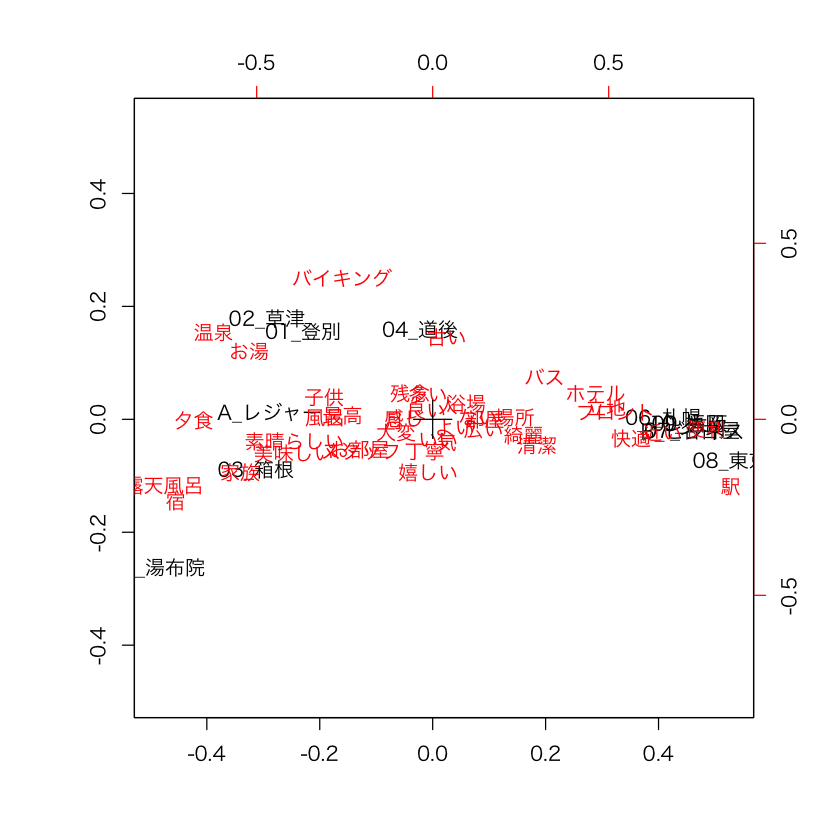

In [7]:
par(family = "HiraKakuProN-W3")
biplot(c)

### (c) 寄与率を確認する

In [8]:
# 固有値 ＝ 正準相関の2乗
k <- c$cor^2
round(k,4) 

# 寄与率 = 固有値 / 固有値の和
round(100*k / sum(k), 2)

[1] 0.1395 0.0103 0.0043 0.0018 0.0012 0.0010 0.0008 0.0004 0.0003 0.0000
[11] 0.0000

[1] 87.37  6.48  2.69  1.12  0.75  0.61  0.51  0.28  0.20  0.00  0.00

### (参考) KHCoder の出力例

In [9]:
# library("imager")
# img<-load.image("khcoder.png")
# plot(as.raster(img, 2048, 2048))

In [10]:
library("png")
img <- readPNG("khcoder-corresp.png")
par(plt=c(0, 1, 0, 1), bty="n")
plot(0, 0, xlim=c(0, 10), ylim=c(10, 0), type="n", asp=1, xaxt="n", xlab="", yaxt="n", ylab="")
rasterImage(img, 0, 10, 10, 0)

ERROR: Error in readPNG("khcoder-corresp.png"): unable to open khcoder-corresp.png


## 3. 対応分析 (自力で計算する場合)

In [ ]:
# 観測度数
table.N[1:10,1:10]

In [ ]:
# 観測度数の行合計
row.sum <- apply(table.N, 1, sum)

# 観測度数の列合計
col.sum <- apply(table.N, 2, sum)

# 観測度数の総計
n <- sum(table.N)

In [ ]:
# 期待度数
expected <- outer(row.sum, col.sum) / sum(table.N)
round(expected, 2)[1:10, 1:10]

In [ ]:
# # Chi-squared test
# chisq <- chisq.test(table.N)

# #  Residuals
# residuals <- chisq$residuals
# residuals[1:10,1:10]

In [ ]:
# χ二乗距離
chisq <- (table.N - expected)^2/expected
round(chisq, 2)[1:10,1:10]

In [ ]:
#  残差
residuals <- (table.N - expected)/sqrt(expected)
round(residuals, 2)[1:10,1:10]

In [ ]:
# 標準化残差
residuals <- residuals / sqrt(n)

# 次元数
nb.axes <- min(nrow(residuals)-1, ncol(residuals)-1)

# 特異値分解
res.svd <- svd(residuals, nu = nb.axes, nv = nb.axes)
summary(res.svd)

In [ ]:
sv <- res.svd$d[1:nb.axes] # singular value
u <-res.svd$u
v <- res.svd$v

In [ ]:
# row mass
row.mass <- row.sum/n

# row coord = sv * u /sqrt(row.mass)
cc <- t(apply(u, 1, '*', sv)) # each row X sv
row.coord <- apply(cc, 2, '/', sqrt(row.mass))
rownames(row.coord) <- rownames(table.N)
colnames(row.coord) <- paste0("Dim.", 1:nb.axes)
head(round(row.coord, 3))

In [ ]:
# col mass
col.mass <- col.sum/n

# coordinates sv * v /sqrt(col.mass)
cc <- t(apply(v, 1, '*', sv))
col.coord <- apply(cc, 2, '/', sqrt(col.mass))
rownames(col.coord) <- colnames(table.N)
colnames(col.coord) <- paste0("Dim", 1:nb.axes)
head(round(col.coord, 3))

In [ ]:
par(family = "HiraKakuProN-W3")

xlim <- range(c(row.coord[,1], col.coord[,1]))*1.1
ylim <- range(c(row.coord[,2], col.coord[,2]))*1.1

# 行方向のプロット (外部変数)
plot(row.coord, pch=19, col = "red", xlim = xlim, ylim = ylim)
text(row.coord, labels =rownames(row.coord), pos = 3, col ="red")

# 列方向のプロット (単語)
points(col.coord, pch=17, col = "blue")
text(col.coord, labels =rownames(col.coord), pos = 3, col ="blue")
abline(v=0, h=0, lty = 2)

In [ ]:
# 固有値
k <- res.svd$d^2
round(k,4) 

# 寄与率
round(100*k / sum(k), 2)

### (参考) KHCoder の出力例

In [ ]:
img <- readPNG("khcoder-corresp.png")
par(plt=c(0, 1, 0, 1), bty="n")
plot(0, 0, xlim=c(0, 10), ylim=c(0, 10), type="n", asp=1, xaxt="n", xlab="", yaxt="n", ylab="")
rasterImage(img, 0, 10, 10, 0)